<a href="https://colab.research.google.com/github/AIREheart/Replication-Station/blob/main/sci_computing_chemists_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
!git clone https://github.com/weisscharlesj/SciCompforChemists.git

Cloning into 'SciCompforChemists'...
remote: Enumerating objects: 15695, done.
remote: Counting objects: 100% (928/928), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 15695 (delta 838), reused 808 (delta 794), pack-reused 14767 (from 3)
Receiving objects: 100% (15695/15695), 542.47 MiB | 19.29 MiB/s, done.
Resolving deltas: 100% (12311/12311), done.
Updating files: 100% (241/241), done.


In [8]:
ROH = pd.read_csv('/content/SciCompforChemists/notebooks/chapter_13/data/ROH_data.csv', sep=',')
ROH

,bp,MW,carbons,degree,aliphatic,avg_aryl_position,cyclic
0,338,32.04,1,1,1,0.0,0
1,351,46.07,2,1,1,0.0,0
2,371,60.10,3,1,1,0.0,0
3,356,60.10,3,2,1,0.0,0
4,391,74.12,4,1,1,0.0,0
...,...,...,...,...,...,...,...
67,435,100.15,6,2,1,0.0,1
68,438,114.19,7,2,0,0.0,1
69,445,114.19,7,2,0,0.0,1
70,436,114.19,7,2,0,0.0,1


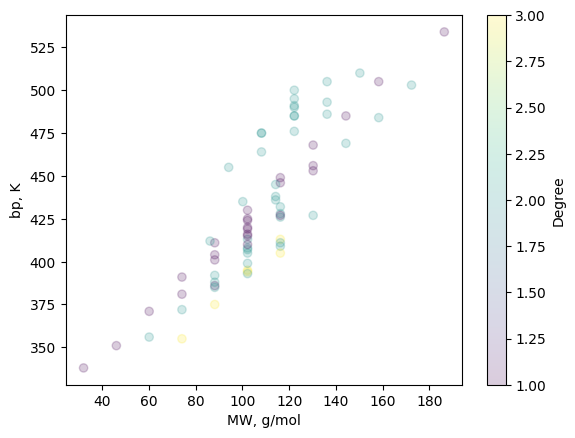

In [9]:
plt.scatter(ROH['MW'], ROH['bp'], alpha=0.2, c=ROH['degree'], cmap='viridis')
plt.xlabel('MW, g/mol')
plt.ylabel('bp, K')
cbar = plt.colorbar()
cbar.set_label('Degree')

In [10]:
from sklearn.model_selection import train_test_split

target = ROH['bp']
features = ROH.drop(['bp'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

In [11]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [12]:
pred_reg = reg.predict(X_test)
pred_reg

array([521.94389573, 439.60028899, 421.38488633, 485.6143471 ,
       355.07207513, 444.98911542, 439.60028899, 487.61879909,
       488.64633926, 497.31838329, 388.22848073, 406.39325504,
       424.6086577 , 444.98911542, 485.56371876, 439.60028899,
       503.77912142, 409.61702641])

Text(350, 480, 'Eval score: 0.9738')

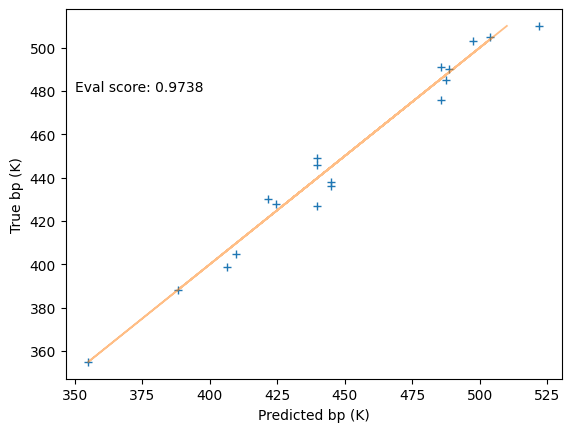

In [13]:
#assessing the model performance

plt.plot(pred_reg, y_test, '+')
plt.plot(y_test, y_test, '-', lw=1.3, alpha=0.5)
plt.xlabel('Predicted bp (K)')
plt.ylabel('True bp (K)')
score_reg = reg.score(X_test, y_test)
plt.annotate(f'Eval score: {score_reg:.4f}', (350, 480))

In [14]:
#alternate training splitting methods (K fold cross val)
from sklearn.model_selection import cross_val_score, ShuffleSplit

splitter = ShuffleSplit(n_splits=5)
reg2 = LinearRegression()
scores = cross_val_score(reg2, features, target, cv = splitter)
scores

array([0.98112472, 0.96352189, 0.96980468, 0.98226588, 0.97442103])

In [15]:
scores.mean()

np.float64(0.9742276412855979)

In [16]:
reg.coef_
#features.columns
#reg2.coef_

array([ -5.06283477,  89.19634615, -14.99163129,   5.73273187,
        -2.05508033,  15.9368917 ])

In [17]:
#to understand the weight of each feature, features must first be scaled in order to be properly compared
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scaler = MinMaxScaler()
scaler.fit(features) #scaler learns the features
scaled_features = scaler.transform(features) #scaler scales


X_train, X_test, y_train, y_test = train_test_split(scaled_features, target)
reg_scaled = LinearRegression()
reg_scaled.fit(X_train, y_train)

LinearRegression()

In [18]:
reg_scaled.coef_
#after testing each scaling method, the # of carbons (2nd feature)
#consistently bears the greatest weight on the pred outcome

array([-866.56489292, 1070.46642416,  -32.23828487,   11.58168982,
        -12.54034155,   14.74856779])

In [ ]:
#random forest classification

#dec trees are simple but usually don't perform well
#rando forests work better



In [23]:
org_comps = pd.read_csv('/content/SciCompforChemists/notebooks/chapter_13/data/org_comp.csv', sep=',')
org_comps

,class,bp,MW,C,cyclic,aromatic,unsaturation
0,0,455,94.11,6,1,1,3
1,0,475,108.14,7,1,1,3
2,0,475,108.14,7,1,1,3
3,0,464,108.14,7,1,1,3
4,0,474,122.17,8,1,1,3
...,...,...,...,...,...,...,...
117,2,498,135.21,9,1,1,3
118,2,407,99.17,6,1,0,1
119,2,381,85.15,5,1,0,1
120,2,327,113.20,7,1,0,1


In [24]:
target = org_comps['class']
features = org_comps.drop(['class'], axis = 1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=18)

In [26]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.predict(X_test)

array([0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       1, 2, 0, 1, 0, 2, 2, 0, 2])

In [27]:
rf.score(X_test, y_test)

0.7096774193548387

In [29]:
#confuzzie matriz

from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test, rf.predict(X_test))
conf_matrix

array([[11,  0,  1],
       [ 2,  3,  0],
       [ 6,  0,  8]])

Text(50.722222222222214, 0.5, 'Predicted Value')

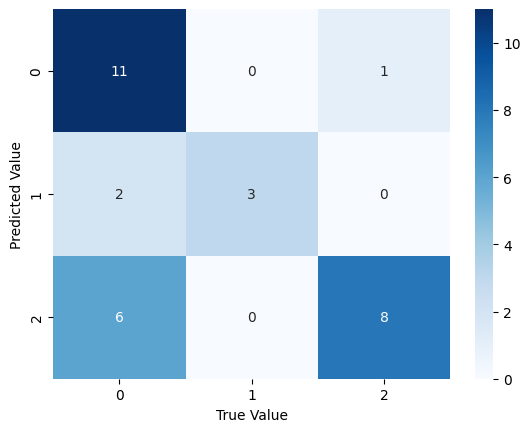

In [31]:
import seaborn as sns

sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')

#array of all the classes possible broken into predicted and actual vals

In [33]:
#unsupervised learning (no defined classes)
#dimensionality reduction where num of features is condendes to
#2 or 3 features while retaining as much info

#clustering is another method where similar items are grouped
from sklearn.datasets import load_wine

wine = load_wine()
wine.data

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [42]:
target = wine.target
features = wine.data

In [49]:
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [43]:
features

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
        8.350e+02],
       [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
        8.400e+02],
       [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
        5.600e+02]])

In [38]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

e.g. PCA containing 2 features:
axis of the greatest variation slopes down and to right being the first principle component (PC)

- the second PC is the axis of second greatest variation perpendicular to the first axis

if the data had a 3rd dim, the 3rd PC would directly out of the page (orthogonal to the first 2 PCs, so the z axis)

the PCs are the new Cartesian axes
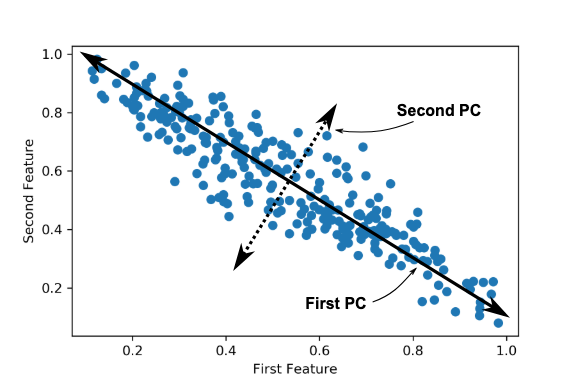

essentially exploring the feature space in the most represented way

using the 'decomposition' scikitlearn module
there's no reason to split the data into training or testing sets (bc the algorithm has no answers) so the algorithm is trained to transform the data instead of making predictions

process roughly is 1. create model (variable) 2. train it by fitting() on all the data and 3 modify the data using the transform method i.e. StandardScaler()


In [44]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()
features_ss = SS.fit_transform(features)

In [45]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
transformed_data = pca.fit_transform(features_ss)
transformed_data.shape

(178, 2)

Text(0.5, 0, 'First Principal Component')

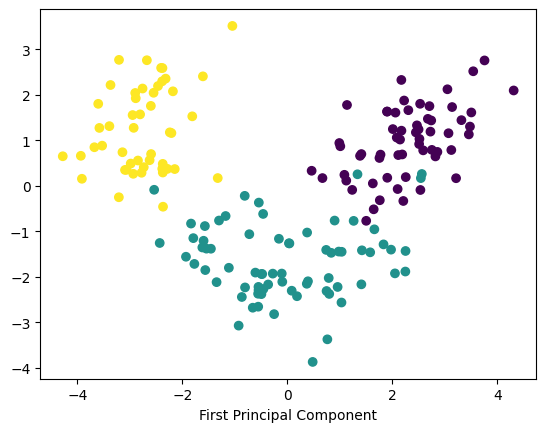

In [50]:
plt.scatter(transformed_data[:,0], transformed_data[:,1], c=target)
plt.xlabel('First Principal Component')

Clustering methods (group similar items)

- k means
- agglomerative
- density based


In [52]:
from sklearn.datasets import make_blobs

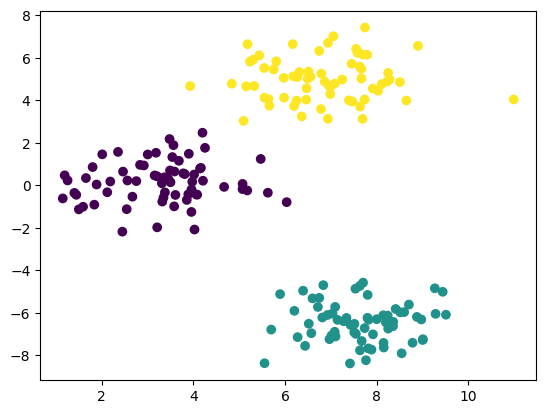

In [59]:
X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=1, random_state=18)
plt.scatter(X[:,0], X[:,1], c=y)

In [62]:
SS = StandardScaler()
X_ss = SS.fit_transform(X)

In [71]:
from sklearn.cluster import DBSCAN
DB = DBSCAN(eps=0.4, min_samples =5)
DB.fit(X_ss)

DBSCAN(eps=0.4)

In [64]:
DB.labels_

array([ 0,  0,  1,  1,  2,  0,  2,  1,  0,  0,  0,  0,  2,  2,  2,  2,  1,
        0,  2,  0,  2,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  0,  1,  1,
        2,  2,  1,  0,  0,  0,  1,  0,  0,  1,  1,  2,  0,  2, -1,  1,  0,
        1,  1,  1,  0,  0,  1,  2,  1,  2,  0,  2,  2,  0,  1,  0,  2,  2,
        2,  0,  2,  1,  1,  0,  2,  1,  0,  2,  0,  1,  0,  2,  0,  2,  0,
        2,  0,  2,  1,  1,  2,  1,  0,  1,  0,  0,  1,  1,  2,  0,  2,  1,
        2,  2,  1,  2,  0,  1,  2,  2,  0,  2,  2,  2,  1,  1,  0,  0,  1,
        0,  2,  2,  1,  1,  1,  2,  2,  1,  0,  0,  1,  1,  2,  2,  0,  2,
        0,  1,  1,  1,  1,  2,  1,  1,  2,  1,  1,  1,  2,  2,  2,  1,  1,
        2,  2,  1,  0,  1,  1,  2,  2,  2,  1,  2,  0,  0,  0,  2, -1,  2,
        2,  2,  1,  2,  0,  0,  2,  1,  0,  1,  1,  2,  0,  2,  1,  1,  2,
        2,  1,  0,  0,  1,  1,  1,  0,  0,  0,  0,  2,  2])

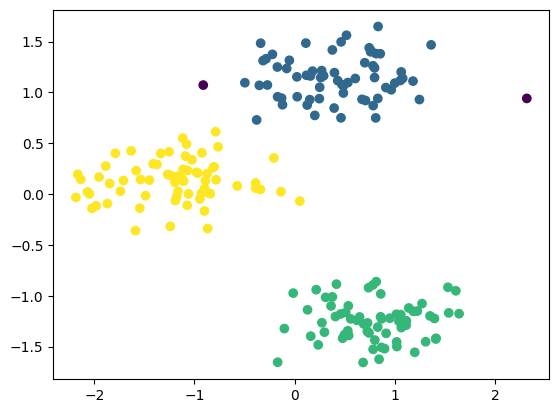

In [72]:
plt.scatter(X_ss[:,0], X_ss[:,1], c=DB.labels_)